In [48]:
from scipy.interpolate import make_interp_spline
from scipy.fftpack import fft, fftshift
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy import signal
from lmfit import Model
import numpy as np
import random
import math

# A real exponential signal is defined as

The exponential: The “exponential” signal literally represents an exponentially increasing or falling series:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtext>Continuous time:</mtext>
  <mtext>&#xA0;</mtext>
  <mi>s</mi>
  <mo stretchy="false">(</mo>
  <mi>t</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <msup>
    <mi>e</mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mi>&#x03B1;<!-- α --></mi>
      <mi>t</mi>
    </mrow>
  </msup>
</math>

Note that negative  values result in a shrinking signal, whereas positive values result in a growing signal. The exponential signal models the behavior of many phenomena, such as the decay of electrical signals across a capacitor or inductor. Positive  values show processes with compounding values, e.g. the growth of money with a compounded interest rate.

The exponential signal violates boundedness, since it is infinite in value either at  <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>t</mi>
  <mo>=</mo>
  <mo>&#x2212;<!-- − --></mo>
  <mi mathvariant="normal">&#x221E;<!-- ∞ --></mi>
</math> (for <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>&#x03B1;<!-- α --></mi>
  <mo>&lt;</mo>
  <mn>0</mn>
</math>)or at  <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>t</mi>
  <mo>=</mo>
  <mi mathvariant="normal">&#x221E;<!-- ∞ --></mi>
</math> (for <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>&#x03B1;<!-- α --></mi>
  <mo>&gt;</mo>
  <mn>0</mn>
</math>).


Text(0.5, 1.0, 'Exponentially decaying signal')

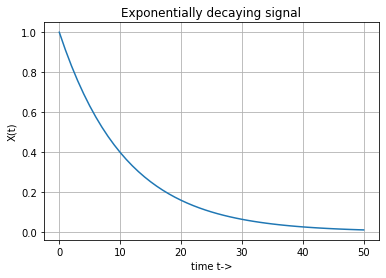

In [19]:
M = 51
tau = -(M-1) / np.log(0.01)
window = signal.exponential(M, 0, tau, False)
plt.figure()
plt.plot(window)
plt.grid()
plt.ylabel("X(t)")
plt.xlabel("time t->")
plt.title("Exponentially decaying signal")

Text(0.5, 1.0, 'Exponentially growing signal')

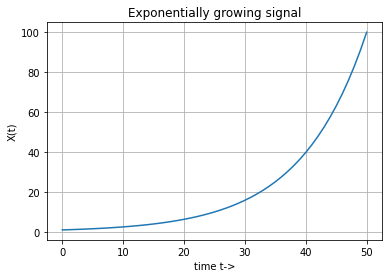

In [20]:
M = 51
tau = (M-1) / np.log(0.01)
window = signal.exponential(M, 0, tau, False)
plt.figure()
plt.plot(window)
plt.grid()
plt.ylabel("X(t)")
plt.xlabel("time t->")
plt.title("Exponentially growing signal")

# Discrete time
In discrete time the definition of the exponential signal takes a slightly different form:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtext>Discrete time:</mtext>
  <mtext>&#xA0;</mtext>
  <mi>s</mi>
  <mo stretchy="false">[</mo>
  <mi>n</mi>
  <mo stretchy="false">]</mo>
  <mo>=</mo>
  <msup>
    <mi>&#x03B1;<!-- α --></mi>
    <mi>n</mi>
  </msup>
</math>

Note that although superficially similar to the continuous version, the effect of  on the behavior of the signal is slightly different. The sign of  does not affect the rising or falling of the signal; instead it affects its oscillatory behavior. Negative alphas cause the signal to alternate between negative and positive values. The magnitude of  affects the rising and falling behavior:  results in falling signals, whereas  results in rising signals.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


Text(0.5, 1.0, 'Exponentially decaying signal')

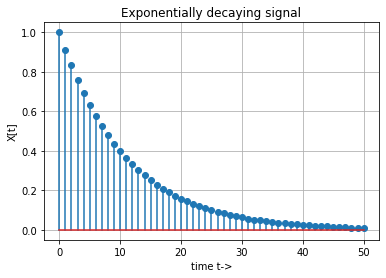

In [21]:
M = 51
tau = -(M-1) / np.log(0.01)
window = signal.exponential(M, 0, tau, False)
plt.figure()
plt.stem(window)
plt.grid()
plt.ylabel("X[t]")
plt.xlabel("time t->")
plt.title("Exponentially decaying signal")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


Text(0.5, 1.0, 'Exponentially growing signal')

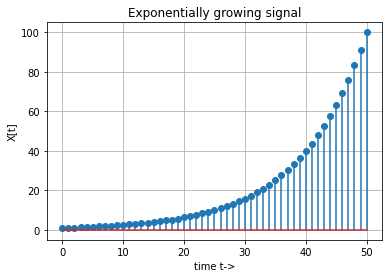

In [22]:
M = 51
tau = (M-1) / np.log(0.01)
window = signal.exponential(M, 0, tau, False)
plt.figure()
plt.stem(window)
plt.grid()
plt.ylabel("X[t]")
plt.xlabel("time t->")
plt.title("Exponentially growing signal")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


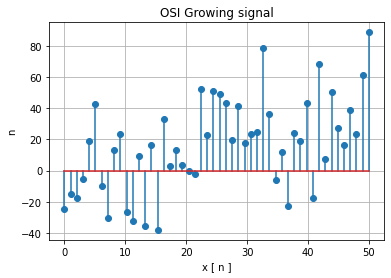

In [147]:
x= np.linspace(0, 50)
y= np.linspace(-20, 50)
y2 =  25 * np.random.normal(size=x.size)
y = y + y2
y[len(y)-1]= max(y)+10
fig, ax = plt.subplots()
ax.stem(x, y)
ax.set(xlabel='x [ n ]', ylabel='n',title='OSI Growing signal')
ax.grid()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


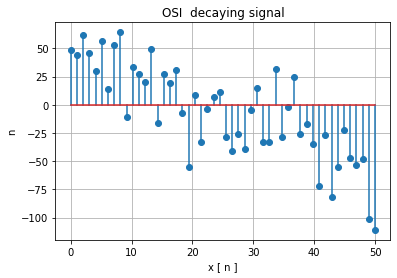

In [146]:
x= np.linspace(0, 50)
y= np.linspace(50, -50)
y2 =  25 * np.random.normal(size=x.size)
y = y + y2
y[len(y)-1]= min(y)-10
fig, ax = plt.subplots()
ax.stem(x, y)
ax.set(xlabel='x [ n ]', ylabel='n',title='OSI  decaying signal')
ax.grid()

In [188]:
def decay_cosine(t):
    """model data as decaying cosine wave"""
    return np.sin(np.pi*t)*np.exp(-t*0.05)

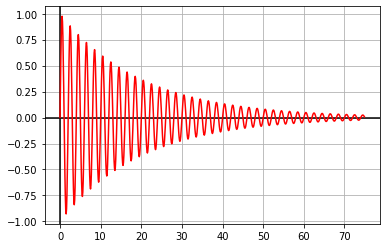

In [200]:
t = np.arange(0.0, 75.0, 0.1)
y = decay_cosine(t)
plt.grid()
plt.axhline(0,color='black')
plt.axvline(0,color='black')
plt.plot(t, y, 'r')
plt.show()

In [205]:
def decay_cosine(t):
    """model data as decaying cosine wave"""
    return np.sin(np.pi*t)*np.exp(t*0.05)

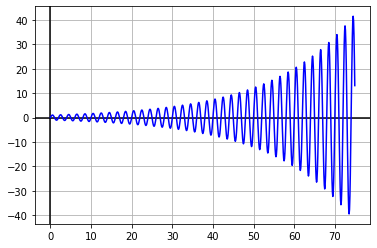

In [208]:
t = np.arange(0.0, 75.0, 0.1)
y = decay_cosine(t)
plt.grid()
plt.axhline(0,color='black')
plt.axvline(0,color='black')
plt.plot(t, y, 'b')
plt.show()

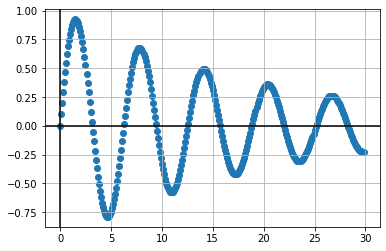

In [242]:
def decay_cosine(t):
    """model data as decaying cosine wave"""
    return np.sin(t)*np.exp(-t*0.05)
t = np.arange(0.0, 30, 0.1)
y = decay_cosine(t)
plt.grid()
plt.axhline(0,color='black')
plt.axvline(0,color='black')
plt.scatter(t, y)
plt.show()

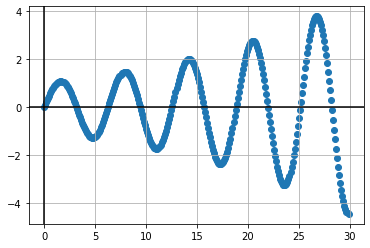

In [245]:
def decay_cosine(t):
    """model data as decaying cosine wave"""
    return np.sin(t)*np.exp(t*0.05)
t = np.arange(0.0, 30, 0.1)
y = decay_cosine(t)
plt.grid()
plt.axhline(0,color='black')
plt.axvline(0,color='black')
plt.scatter(t, y)
plt.show()

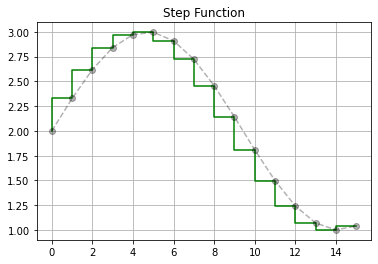

In [255]:
x = np.arange(16)
y = np.sin(x / 3)
  
fig, ax = plt.subplots()
  
ax.step(x, y + 2, color ='green')
ax.plot(x, y + 2, 'o--', color ='black', alpha = 0.3)
ax.set_title('Step Function')
plt.grid()
plt.show()